In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split



In [2]:
n_samples = 1000
n_features = 2


X_blob, y_blob = make_blobs(n_samples, 
                            n_features, 
                            random_state= 42, 
                            centers= 4, 
                            cluster_std=1)

In [3]:
#turn data into tensors:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

In [4]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, random_state=42, test_size= 0.2)

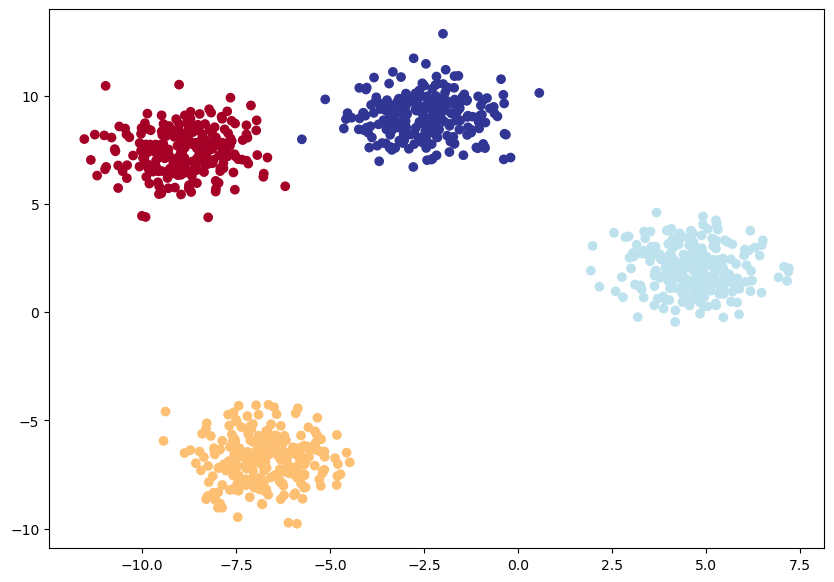

In [5]:
#plot the data:
plt.figure(figsize=(10, 7))
plt.scatter(x = X_blob[:,0], y = X_blob[:,1], c = y_blob, cmap = plt.cm.RdYlBu_r)

In [6]:
#create the model:

class blob0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        
        
        self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features= input_features, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features= output_features)) 
        
    def forward(self, x):
        return self.linear_layer_stack(x)

In [7]:
model = blob0(input_features=2, output_features= 4, hidden_units =8)

In [8]:
model

blob0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [9]:
#setup loss function and optimizer:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model.parameters(), lr = 0.01)

In [10]:
model(X_blob_test).shape

torch.Size([200, 4])

In [18]:
#get raw outputs of our model:
model.eval()
with torch.inference_mode():
    y_logit = model(X_blob_test)
y_logit[:5]

tensor([[ 2.6107,  8.3595, -1.2486, -4.2630],
        [ 2.4264, -6.3361, -3.9574,  7.5189],
        [-6.6669, -5.0346,  5.3726, -1.5770],
        [ 1.7968,  6.5554, -0.9175, -3.3154],
        [ 8.5789,  3.6446, -3.6781,  1.4430]])

normally in  a binary classification problems, we use sigmoid to change the logits,
but here because we are using a multiclass classification model, we change the logist 
to predictions with softmax and not sigmoid


In [19]:
#The softmax function calculates the probability of each prediction class being the 
#actual predicted class compared to all other possible classes.
y_pred_prob = torch.softmax(y_logit, dim = 1)
print(y_pred_prob[:5])
print(y_logit[:5])

tensor([[3.1762e-03, 9.9675e-01, 6.6963e-05, 3.2862e-06],
        [6.1053e-03, 9.5537e-07, 1.0310e-05, 9.9388e-01],
        [5.9000e-06, 3.0183e-05, 9.9901e-01, 9.5801e-04],
        [8.4998e-03, 9.9089e-01, 5.6311e-04, 5.1191e-05],
        [9.9207e-01, 7.1389e-03, 4.7140e-06, 7.8970e-04]])
tensor([[ 2.6107,  8.3595, -1.2486, -4.2630],
        [ 2.4264, -6.3361, -3.9574,  7.5189],
        [-6.6669, -5.0346,  5.3726, -1.5770],
        [ 1.7968,  6.5554, -0.9175, -3.3154],
        [ 8.5789,  3.6446, -3.6781,  1.4430]])


In [20]:
y_preds = torch.argmax(y_pred_prob, dim = 1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [21]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

In [22]:
y_blob_train.shape

torch.Size([800])

In [23]:
def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) *100
    return acc

In [24]:
#create a training loop:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    model.train()
    y_logit_train = model(X_blob_train)
    y_prob_pred_train = torch.softmax(y_logit_train, dim = 1).argmax(dim = 1)
    #we use argmax to get the index where the maximum prediction prob occurs
    loss_train = loss(y_logit_train , y_blob_train.long())
    acc_train = accuracy_function(y_true = y_prob_pred_train, y_pred = y_blob_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        y_logit_test = model(X_blob_test)
        y_prob_pred_test = torch.softmax(y_logit_test, dim = 1).argmax(dim = 1)
        #we use argmax to get the index where the maximum prediction prob occurs
        loss_test = loss(y_logit_test, y_blob_test.long())
        acc_test = accuracy_function(y_true = y_prob_pred_test, y_pred = y_blob_test)
        
    if epoch %100 == 0:
        print(f"Epoch: {epoch} ||| Training Loss: {loss_train.item():.4f} ||| Training Accuracy: {acc_train:.2f}% ||| Test Loss: {loss_test.item():.4f} ||| Test Accuracy: {acc_test:.2f}%")

Epoch: 0 ||| Training Loss: 0.0099 ||| Training Accuracy: 99.88% ||| Test Loss: 0.0080 ||| Test Accuracy: 100.00%
Epoch: 100 ||| Training Loss: 0.0089 ||| Training Accuracy: 99.88% ||| Test Loss: 0.0070 ||| Test Accuracy: 100.00%
Epoch: 200 ||| Training Loss: 0.0080 ||| Training Accuracy: 99.88% ||| Test Loss: 0.0063 ||| Test Accuracy: 100.00%
Epoch: 300 ||| Training Loss: 0.0074 ||| Training Accuracy: 99.88% ||| Test Loss: 0.0056 ||| Test Accuracy: 100.00%
Epoch: 400 ||| Training Loss: 0.0068 ||| Training Accuracy: 99.88% ||| Test Loss: 0.0051 ||| Test Accuracy: 100.00%
Epoch: 500 ||| Training Loss: 0.0064 ||| Training Accuracy: 99.88% ||| Test Loss: 0.0047 ||| Test Accuracy: 100.00%
Epoch: 600 ||| Training Loss: 0.0060 ||| Training Accuracy: 99.88% ||| Test Loss: 0.0044 ||| Test Accuracy: 100.00%
Epoch: 700 ||| Training Loss: 0.0057 ||| Training Accuracy: 99.88% ||| Test Loss: 0.0041 ||| Test Accuracy: 100.00%
Epoch: 800 ||| Training Loss: 0.0054 ||| Training Accuracy: 99.88% ||| Tes

In [25]:
#make predictions:
model.eval()
with torch.inference_mode():
    y_logits = model(X_blob_test)
    
#view first 10 predictions:
y_logits[:10]

tensor([[ 2.8602,  9.8845, -1.3765, -5.3117],
        [ 2.4437, -7.4979, -4.0966,  8.6316],
        [-7.8868, -5.5132,  6.3455, -1.6450],
        [ 1.9187,  7.6998, -1.0166, -4.0891],
        [10.0036,  4.0233, -4.0686,  1.1801],
        [ 2.4740, -8.4573, -4.5114,  9.6477],
        [-7.1036, -5.0198,  5.9908, -1.7024],
        [ 9.6593,  2.2029, -3.7981,  2.1096],
        [-9.2963, -6.4444,  7.0960, -1.6011],
        [ 9.6887,  2.7990, -3.8303,  1.7655]])

In [26]:
#go from logits to prediction probs:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[8.8919e-04, 9.9910e-01, 1.2852e-05, 2.5116e-07],
        [2.0500e-03, 9.8671e-08, 2.9604e-06, 9.9795e-01],
        [6.5895e-07, 7.0747e-06, 9.9965e-01, 3.3855e-04],
        [3.0753e-03, 9.9675e-01, 1.6335e-04, 7.5639e-06],
        [9.9733e-01, 2.5214e-03, 7.7153e-07, 1.4685e-04],
        [7.6592e-04, 1.3702e-08, 7.0867e-07, 9.9923e-01],
        [2.0558e-06, 1.6518e-05, 9.9953e-01, 4.5571e-04],
        [9.9890e-01, 5.7712e-04, 1.4291e-06, 5.2567e-04],
        [7.6004e-08, 1.3164e-06, 9.9983e-01, 1.6704e-04],
        [9.9862e-01, 1.0169e-03, 1.3433e-06, 3.6174e-04]])

In [27]:
#go from pred probs to label:
y_label_pred = torch.argmax(y_pred_probs, dim = 1)
y_label_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [28]:
#compare to the real labels:
torch.eq(y_label_pred, y_blob_test)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

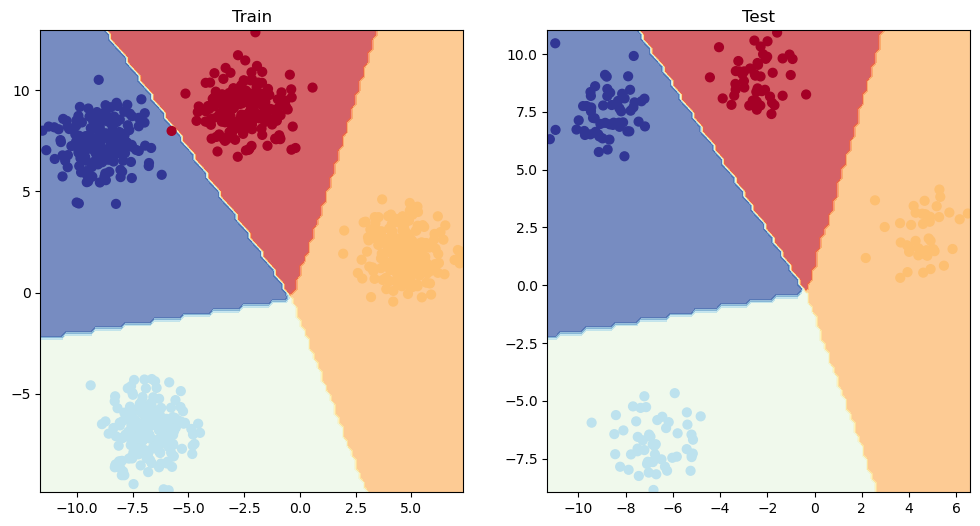

In [29]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)